In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

#### Import All Dateset and select date in 2017

In [2]:
df = pd.read_csv('C:/Users/77230/Downloads/Assignment/assignment2_dataset/all_stocks_2017-01-01_to_2018-01-01.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
df['year'] = df['Date'].dt.year

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 8 columns):
Date      7781 non-null datetime64[ns]
Open      7757 non-null float64
High      7772 non-null float64
Low       7762 non-null float64
Close     7781 non-null float64
Volume    7781 non-null int64
Name      7781 non-null object
year      7781 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 486.4+ KB


In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Name,year
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM,2017
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM,2017
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM,2017
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM,2017
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM,2017


In [7]:
dfn = df[(df['Name']=='NKE')]
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 5020 to 5270
Data columns (total 8 columns):
Date      251 non-null datetime64[ns]
Open      250 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
Name      251 non-null object
year      251 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 17.6+ KB


#### NIKE Close Price by Date

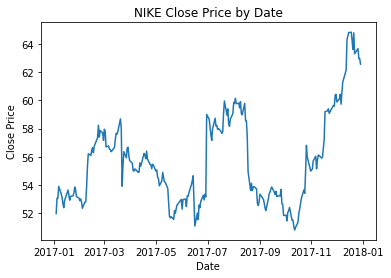

In [8]:
x=dfn['Date']
y=dfn['Close']
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NIKE Close Price by Date')
plt.show()

#### NIKE Volume by Date

Text(0.5,1,'NIKE Volume by Date')

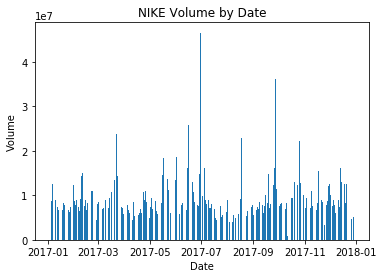

In [9]:
x=dfn['Date']
y=dfn['Volume']
plt.bar(x, y)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('NIKE Volume by Date')

#### All Stocks & NIKE Daily Return

In [10]:
df['Daily Return'] = df['Close'].pct_change()

In [11]:
dfn['Daily Return'] = dfn['Close'].pct_change()

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



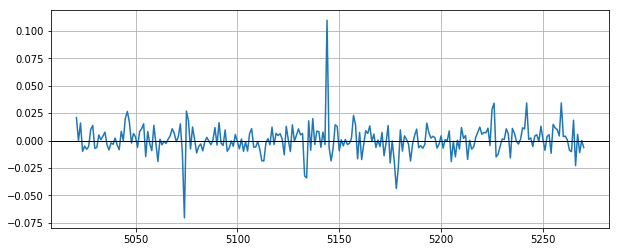

In [12]:
dfn['Daily Return'].plot(grid = True,figsize=(10,4)).axhline(y = 0, color = "black", lw = 1)

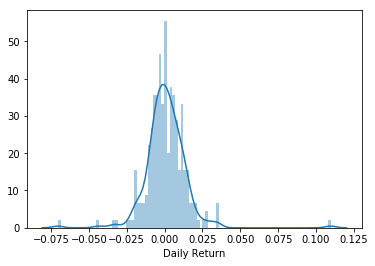

In [13]:
sns.distplot(dfn["Daily Return"].dropna(),bins=100)

#### Compare NIKE with some cooperatative companies

In [14]:
pick = ['NKE','AMZN','XOM']
coo=df[['Date','Close','Name','Volume']][df['Name'].isin(pick)]

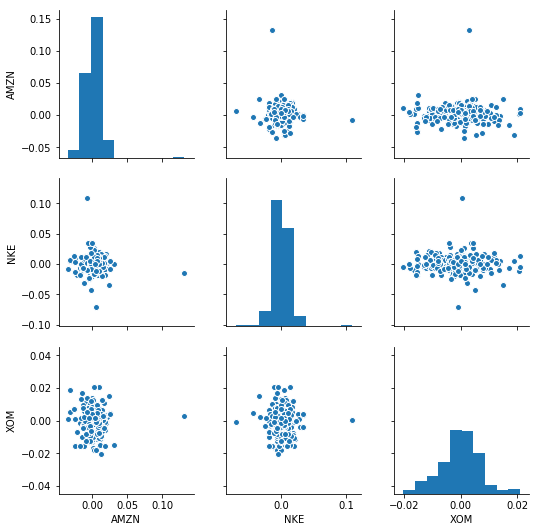

In [15]:
coop=coo.pivot(values='Close',index='Date',columns='Name')
coor=coop.pct_change()
sns.pairplot(coor.dropna())

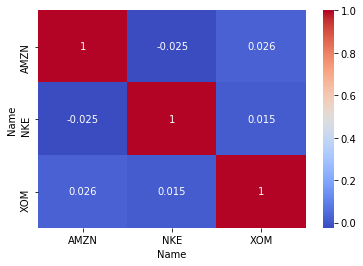

In [16]:
sns.heatmap(coor.corr(),cmap='coolwarm',annot=True)

#### NIKE and Its Coopretative Companies' Return Correlation Analysis

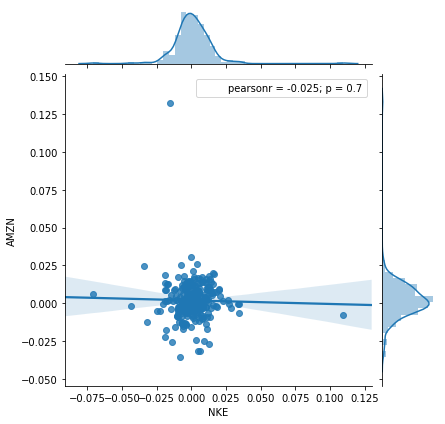

In [17]:
sns.jointplot(x='NKE',y='AMZN',data=coor,kind='reg')

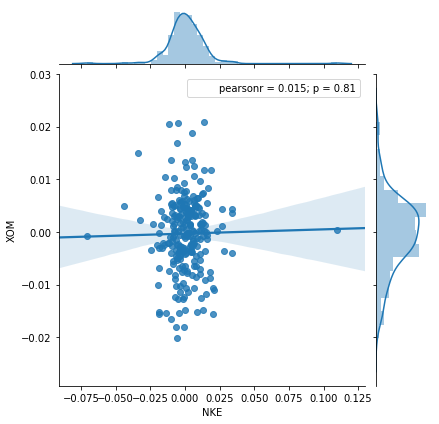

In [18]:
sns.jointplot(x='NKE',y='XOM',data=coor,kind='reg')

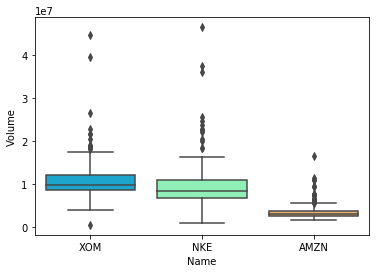

In [19]:
sns.boxplot(x="Name", y="Volume", data=coo,palette='rainbow')

#### All stocks tendency in 2017

In [20]:
dfn[['High','Close']].iplot(kind='spread')

In [21]:
df[['High','Close']].iplot(kind='spread')